# Setup 

In [1]:
import sys
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DAY_NAMES = ['lunes','martes','miércoles','jueves','viernes','sábado','domingo']

In [3]:
dataset = '../datasets/dataset.csv'
df = pd.read_csv(dataset, sep=',', encoding='utf-8').drop({'Unnamed: 0'}, axis=1)

In [4]:
df['weekday'] = pd.DatetimeIndex(df.date).weekday

Descripción de las variables
- “userid”: Identificador único del browser de navegación.
- “Date”: Fecha (YYYY-MM-DD) de la sesión actual
- “cant_actions”: Cantidad de eventos del usuario en la sesión previa
- “search”: Cantidad de eventos de búsqueda de la sesión previa
- “detail”: Cantidad de eventos de detalle de la sesión previa
- “checkout”: Cantidad de eventos de checkout de la sesión previa
- “thanks”: Cantidad de eventos de compra de la sesión previa
- “comprador”: Es la variable que queremos predecir, si compró o no algún hotel.
- “comprador_sess”: Si compró un hotel en la sesión previa
- “used_tablet”: Si el dispositivo usado es una tablet
- “used_smartphone”: Si el dispositivo usado es un celular
- “timeprox”: Distancia en milisegundos entre la sesión actual y la previa
- “longsess”: Duración en milisegundos de la sesión previa
- “cantsesiones”: Cantidad de sesiones previas a la actual en los últimos 15 días
- “dur_media”: Duración media (en segundos) de la estadía buscada en la sesión previa
- “ant_media”: Anticipación media (en segundos) entre la fecha de la sesión previa y las fechas de
check-in buscadas


# Exploración 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222989 entries, 0 to 222988
Data columns (total 17 columns):
userid             222881 non-null object
date               222989 non-null object
cant_actions       222989 non-null int64
search             222410 non-null float64
detail             222989 non-null int64
checkout           222989 non-null int64
thanks             222989 non-null int64
comprador          222989 non-null bool
comprador_sess     222989 non-null bool
used_tablet        222989 non-null object
used_smartphone    222859 non-null object
timeprox           222989 non-null int64
longsess           222989 non-null int64
cantsesiones       222989 non-null int64
dur_media          222989 non-null float64
ant_media          222989 non-null float64
weekday            222989 non-null int64
dtypes: bool(2), float64(3), int64(8), object(4)
memory usage: 25.9+ MB


In [6]:
df.describe()

,cant_actions,search,detail,checkout,thanks,timeprox,longsess,cantsesiones,dur_media,ant_media,weekday
count,222989.000000,222410.000000,222989.000000,222989.000000,222989.000000,2.229890e+05,2.229890e+05,222989.000000,2.229890e+05,2.229890e+05,222989.000000
mean,4.908628,1.461913,1.677518,0.815453,0.017934,2.367240e+08,4.162719e+05,3.863612,2.745702e+05,4.054378e+06,2.731184
std,72.601781,16.327508,12.495094,44.352587,0.146492,3.153581e+08,8.336248e+05,7.140104,2.487166e+05,5.848464e+06,1.972086
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.800037e+06,0.000000e+00,1.000000,0.000000e+00,-2.099175e+08,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.217785e+07,0.000000e+00,1.000000,8.640000e+04,2.608357e+05,1.000000
50%,2.000000,1.000000,0.000000,0.000000,0.000000,8.435179e+07,6.251500e+04,2.000000,2.592000e+05,1.773552e+06,3.000000
75%,5.000000,2.000000,2.000000,1.000000,0.000000,3.458784e+08,4.468240e+05,4.000000,3.456000e+05,5.625098e+06,4.000000
max,19664.000000,4560.000000,3330.000000,11774.000000,9.000000,1.295984e+09,2.867021e+07,125.000000,7.430400e+06,4.722639e+07,6.000000


## período

In [7]:
'inicio: {}, fin: {}'.format(df.date.min(),df.date.max())

'inicio: 2018-05-14, fin: 2018-06-12'

## total de sesiones por día de la semana 

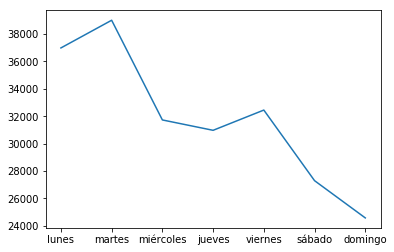

In [9]:
df.weekday.value_counts(sort=False).sort_index().plot()
plt.xticks(ticks=np.arange(7),labels=DAY_NAMES);l

## usuarios

In [10]:
df.userid.nunique()

98397

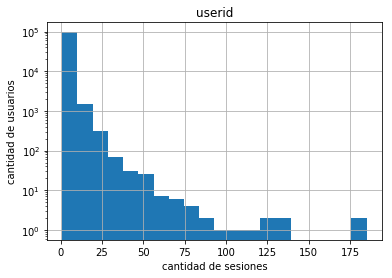

In [11]:
df.userid.value_counts().to_frame().hist(bins=20);
plt.yscale('log')
plt.xlabel('cantidad de sesiones')
plt.ylabel('cantidad de usuarios');

## eventos

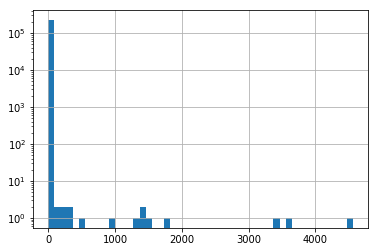

In [19]:
df.search.hist(bins=50)
plt.yscale('log')

In [16]:
#df.cant_actions == (df.search + df.detail + df.checkout + df.thanks)

search_is_na = df.search.isna()
df[search_is_na]

,userid,date,cant_actions,search,detail,checkout,thanks,comprador,comprador_sess,used_tablet,used_smartphone,timeprox,longsess,cantsesiones,dur_media,ant_media,weekday
0,c277e837-9,2018-06-09,1,NaN,0,1,0,False,False,dfg,True,75131034,0,5,345600.0,2615135.0,5
8,ed793ed1-7,2018-06-11,1,NaN,0,0,0,False,False,dfg,True,3032501,0,2,345600.0,997605.0,0
1194,e7da0c0b-7,2018-05-22,3,NaN,0,0,0,False,False,False,True,98014996,226926,1,345600.0,563468.0,1
1552,49d6c9da-6,2018-05-18,9,NaN,3,0,0,False,False,False,False,170638765,353608,5,259200.0,8596002.0,4
1961,29e7c068-6,2018-05-23,1,NaN,0,0,0,False,False,False,False,181237564,0,6,345600.0,11949455.0,2
2201,7d0a1d65-5,2018-06-03,2,NaN,0,0,0,True,False,False,False,4598505,52436,1,864000.0,562222.2,6
2446,f4beb280-a,2018-06-01,1,NaN,0,0,0,False,False,dfg,False,869216007,0,1,0.0,0.0,4
2800,2b779de1-5,2018-05-28,2,NaN,0,0,0,False,False,dfg,True,622534941,23558,2,0.0,0.0,0
4579,9f25d061-f,2018-06-10,3,NaN,1,0,0,False,False,dfg,True,482580894,7492,2,345600.0,11674976.0,6
4881,a496b4f3-3,2018-05-30,16,NaN,5,0,0,False,False,dfg,False,10879107,908107,1,259200.0,3250071.0,2


In [13]:
df.cant_actions.describe()
df.cant_actions.isna().sum()

0

## dispositivo

In [12]:
# smartphone - full data 
df.used_smartphone.isna().sum() == 0

False

In [13]:
# tablet - full data 
df.used_tablet.isna().sum() == 0

True

In [14]:
# device True state integrity
((df.used_tablet == True) & (df.used_smartphone == True)).sum() == 0

True

In [17]:
# pc users
r, c = df.shape

r == (df.used_tablet.value_counts()[1] + df.used_smartphone.value_counts()[0])

False

In [18]:
df.used_tablet.value_counts()

dfg      133308
False     88413
True       1268
Name: used_tablet, dtype: int64

In [19]:
df.used_smartphone.value_counts()

True     135959
False     86900
Name: used_smartphone, dtype: int64

In [29]:
# pc users?
is_tablet = df.used_tablet == True
is_smartphone = df.used_smartphone == True
used_tablet_dfg = df.used_tablet.str.contains('dfg')

# ((used_tablet_dfg) & (is_smartphone)).sum()

# df[used_tablet_dfg].used_smartphone.value_counts()
df[used_tablet_dfg].thanks.value_counts()

# ninguno de los que usan smartphone 

0    131091
1      2100
2        91
3        14
4         8
7         2
8         1
5         1
Name: thanks, dtype: int64

# Limpieza

# Análisis 

# Probabilidad de compra

## ¿En qué día de navegación es más probable que compre?

## ¿Cómo cambia la probabilidad de compra cuando cambian la cantidad de acciones?

## ¿Si tuviera que quedarse con 2 variables, cuáles son las más importantes? 

## ¿Cómo mediría el ajuste del modelo? 

## ¿Qué momento elegiría para hacer una oferta de precio? (con qué cantidad de días-acciones-etc.).

# Reglas para dar descuentos 

# Anexos 